In [1]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('delivery_time.csv')

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [5]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
df.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

array([[<Axes: title={'center': 'Delivery Time'}>,
        <Axes: title={'center': 'Sorting Time'}>]], dtype=object)

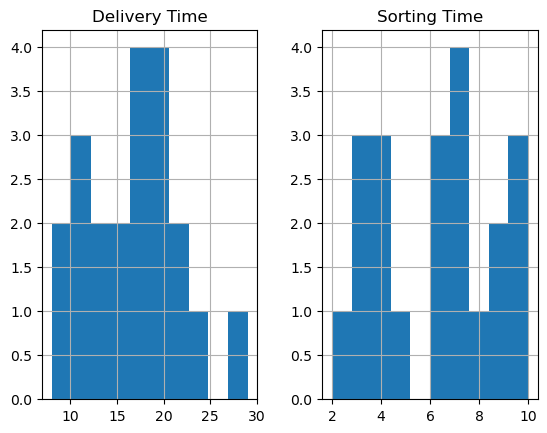

In [7]:
df.hist()

<Axes: xlabel='Delivery Time', ylabel='Count'>

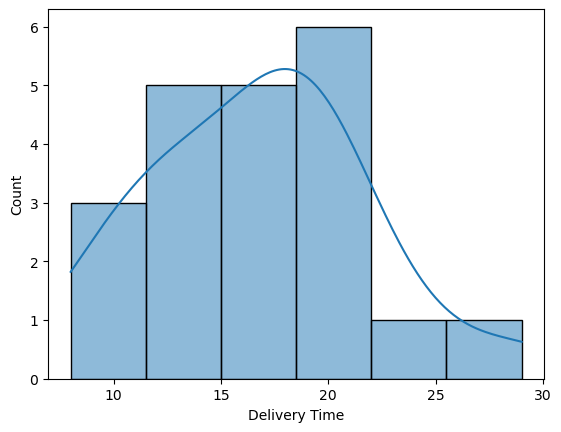

In [8]:
sns.histplot(df["Delivery Time"],kde=True)

<Axes: xlabel='Sorting Time', ylabel='Count'>

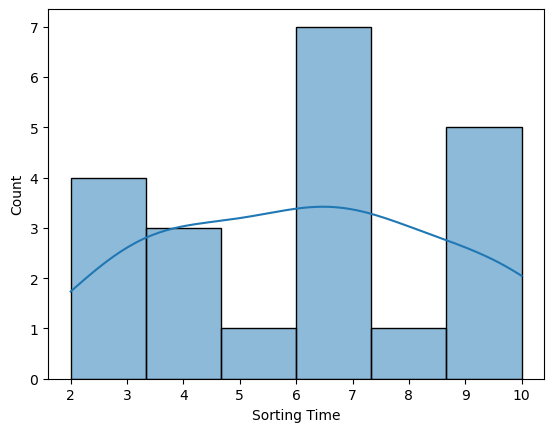

In [9]:
sns.histplot(df["Sorting Time"],kde=True)

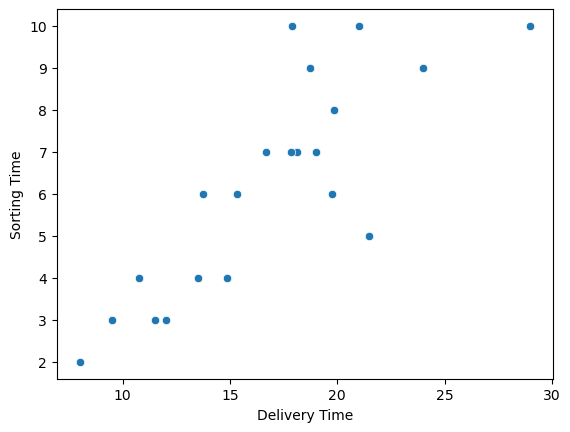

In [10]:
sns.scatterplot(x="Delivery Time",y="Sorting Time",data=df) #checking the relationship between variables
plt.show()

<Axes: xlabel='Delivery Time', ylabel='Sorting Time'>

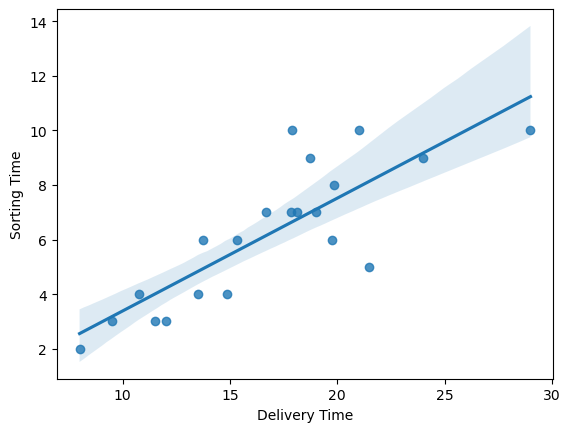

In [11]:
sns.regplot(x='Delivery Time', y='Sorting Time', data=df)

In [12]:
df.corr()

#Strong positive correlation exist between two variables

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [13]:
df = df.rename(columns = {"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"})

# Model building of Delivery Time

In [14]:
model = smf.ols('Sorting_Time~Delivery_Time',data=df).fit() 

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        04:28:35   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
Delivery_Time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model.params

Intercept       -0.756673
Delivery_Time    0.413744
dtype: float64

In [17]:
df['Delivery_Time'].head(6)

0    21.00
1    13.50
2    19.75
3    24.00
4    29.00
5    15.35
Name: Delivery_Time, dtype: float64

In [18]:
model.resid

0     2.068057
1    -0.828866
2    -1.414763
3    -0.173174
4    -1.241892
5     0.405709
6    -0.104456
7    -0.173891
8     3.350662
9     1.998980
10    0.552137
11    0.308929
12    0.855430
13   -1.001378
14   -1.220662
15   -1.399832
16    1.067698
17    0.263776
18   -0.553276
19    0.379624
20   -3.138815
dtype: float64

In [19]:
model.predict(df["Delivery_Time"])

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64

In [20]:
pred = model.predict(df["Delivery_Time"])

In [21]:
rmse = np.sqrt(np.mean((np.array(df["Sorting_Time"])-np.array(pred))**2)) 
rmse

1.3983430567957227

In [22]:
#R squared values

(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [23]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues)  

Intercept       -0.667290
Delivery_Time    6.387447
dtype: float64 
 Intercept        0.512611
Delivery_Time    0.000004
dtype: float64


# Model 2 (TRANSFORMATION)

In [24]:
model2 = smf.ols('Sorting_Time~np.log(Delivery_Time)', data=df).fit() 

In [25]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting_Time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           1.59e-06
Time:                        04:28:35   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(Delivery_Time)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model2.params

Intercept               -12.499233
np.log(Delivery_Time)     6.735548
dtype: float64

In [27]:
model2.resid

0     1.992704
1    -1.031310
2    -1.593942
3     0.093297
4    -0.181351
5     0.103672
6    -0.333179
7     0.335548
8     3.068518
9     1.756035
10    0.378830
11    0.502940
12    0.543982
13   -0.951314
14   -1.254794
15   -1.686869
16    0.845099
17   -0.010043
18    0.493053
19    0.094910
20   -3.165786
dtype: float64

In [28]:
pred2 = model2.predict(df["Delivery_Time"])
pred2

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

In [29]:
rmse2 = np.sqrt(np.mean((np.array(df["Sorting_Time"])-np.array(pred2))**2)) 
rmse2

1.333747728689952

In [30]:
#R squared values

(model2.rsquared, model2.rsquared_adj)

(0.7109478980584185, 0.6957346295351774)

In [31]:
#t and p-Values

print(model2.tvalues, '\n', model2.pvalues)  

Intercept               -4.543446
np.log(Delivery_Time)    6.836088
dtype: float64 
 Intercept                0.000222
np.log(Delivery_Time)    0.000002
dtype: float64


# Model 3 (TRANSFORMATION)

In [32]:
model3 = smf.ols('np.log(Sorting_Time)~Delivery_Time', data=df).fit() 

In [33]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_Time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Tue, 03 Oct 2023   Prob (F-statistic):           2.64e-06
Time:                          04:28:35   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
Delivery_Time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model3.params

Intercept        0.437237
Delivery_Time    0.076901
dtype: float64

In [35]:
model3.resid

0     0.250437
1    -0.089100
2    -0.164263
3    -0.085625
4    -0.364767
5     0.174099
6     0.047563
7    -0.069179
8     0.488829
9     0.318103
10    0.117267
11    0.122377
12    0.225972
13   -0.222981
14   -0.263738
15   -0.195222
16    0.297140
17    0.116005
18   -0.359294
19    0.137537
20   -0.481160
dtype: float64

In [36]:
pred3 = model3.predict(df["Delivery_Time"])
pred3

0     2.052148
1     1.475394
2     1.956022
3     2.282850
4     2.667352
5     1.617660
6     1.898347
7     1.167792
8     1.813756
9     1.879122
10    1.962174
11    1.263917
12    1.719938
13    1.321593
14    1.362350
15    1.581517
16    1.494619
17    1.829905
18    1.052441
19    1.808373
20    2.090598
dtype: float64

In [37]:
rmse3 = np.sqrt(np.mean((np.array(df["Sorting_Time"])-np.array(pred3))**2)) 
rmse3

4.964666458679056

In [38]:
#t and p-Values

print(model3.tvalues, '\n', model3.pvalues)  

Intercept        2.139296
Delivery_Time    6.586789
dtype: float64 
 Intercept        0.045609
Delivery_Time    0.000003
dtype: float64


In [39]:
#R squared values

(model3.rsquared, model3.rsquared_adj)

(0.6954434611324224, 0.6794141696130762)

# Model 4 (TRANSFORMATION)

In [40]:
model4 = smf.ols('np.sqrt(Sorting_Time)~Delivery_Time', data=df).fit() 

In [41]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.sqrt(Sorting_Time)   R-squared:                       0.696
Model:                               OLS   Adj. R-squared:                  0.680
Method:                    Least Squares   F-statistic:                     43.46
Date:                   Tue, 03 Oct 2023   Prob (F-statistic):           2.61e-06
Time:                           04:28:35   Log-Likelihood:                -3.5906
No. Observations:                     21   AIC:                             11.18
Df Residuals:                         19   BIC:                             13.27
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9609      0.233      4.128      0.001       0.474       1.448
Delivery_Time     0.0877      0.013      6.592      0.000       0.060       0.116
==============================================================================
Omnibus:                        0.087   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.957   Jarque-Bera (JB):                0.114
Skew:                           0.099   Prob(JB):                        0.945
Kurtosis:                       2.698   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
model4.params

Intercept        0.960934
Delivery_Time    0.087671
dtype: float64

In [43]:
model4.resid

0     0.360260
1    -0.144488
2    -0.242940
3    -0.065030
4    -0.341106
5     0.142811
6     0.019075
7    -0.061755
8     0.632039
9     0.395241
10    0.128984
11    0.096606
12    0.222471
13   -0.237096
14   -0.283561
15   -0.265474
16    0.283084
17    0.097101
18   -0.248086
19    0.121649
20   -0.609785
dtype: float64

In [44]:
pred4 = model4.predict(df["Delivery_Time"])
pred4

0     2.802018
1     2.144488
2     2.692430
3     3.065030
4     3.503383
5     2.306679
6     2.626677
7     1.793805
8     2.530239
9     2.604759
10    2.699443
11    1.903394
12    2.423281
13    1.969147
14    2.015612
15    2.265474
16    2.166406
17    2.548650
18    1.662299
19    2.524102
20    2.845853
dtype: float64

In [45]:
rmse4 = np.sqrt(np.mean((np.array(df["Sorting_Time"])-np.array(pred4))**2)) 
rmse4

4.322251394706644

In [46]:
#t and p-Values

print(model4.tvalues, '\n', model4.pvalues)  

Intercept        4.127576
Delivery_Time    6.592434
dtype: float64 
 Intercept        0.000573
Delivery_Time    0.000003
dtype: float64


In [47]:
#R squared values

(model4.rsquared, model4.rsquared_adj)

(0.6958062276308671, 0.6797960290851233)

# Prediction

In [48]:
newdata=pd.Series([8,13])

In [49]:
data_pred=pd.DataFrame(newdata,columns=['Delivery_Time'])
data_pred

,Delivery_Time
0,8
1,13


In [50]:
model2.predict(data_pred)

0    1.506947
1    4.777108
dtype: float64

#Conclusion: model2 is the best suitable for this dataset as among all Models (total 4) model2 is giving the best accuracy

# Salary Hike

In [51]:
df1 = pd.read_csv('Salary_Data.csv')

In [52]:
df1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [54]:
df1.isna().sum()/len(df1)*100

YearsExperience    0.0
Salary             0.0
dtype: float64

In [55]:
df1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

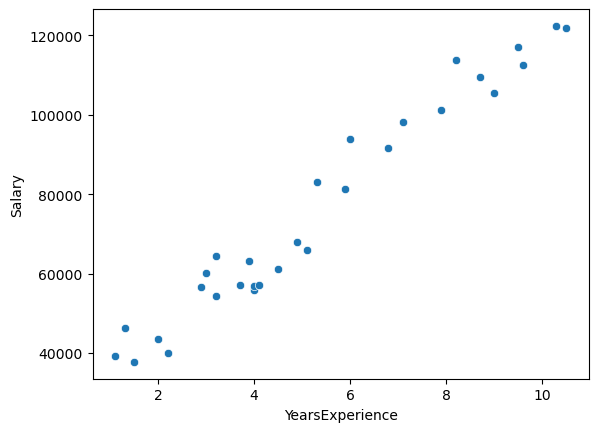

In [56]:
sns.scatterplot(x="YearsExperience",y="Salary",data=df1) 

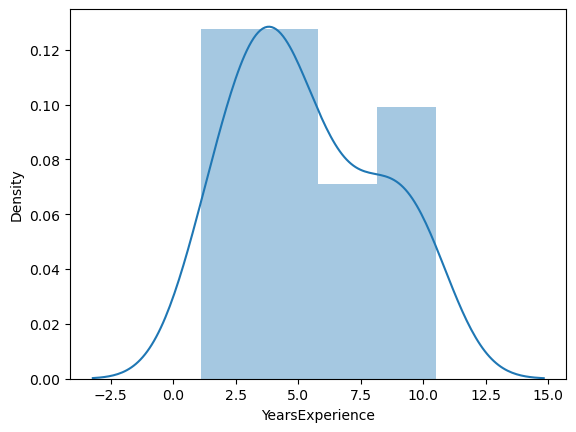

In [57]:
sns.distplot(df1['YearsExperience'])
plt.show()

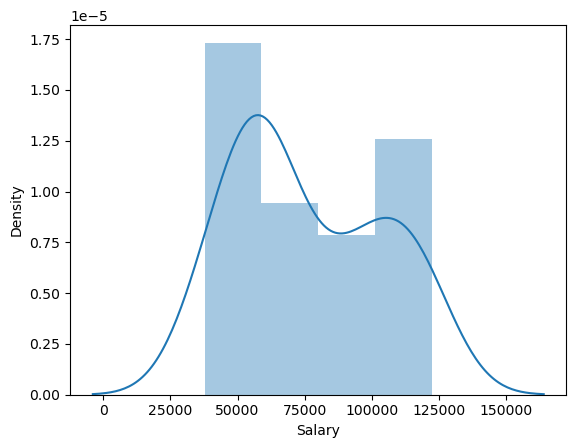

In [58]:
sns.distplot(df1['Salary'])
plt.show()

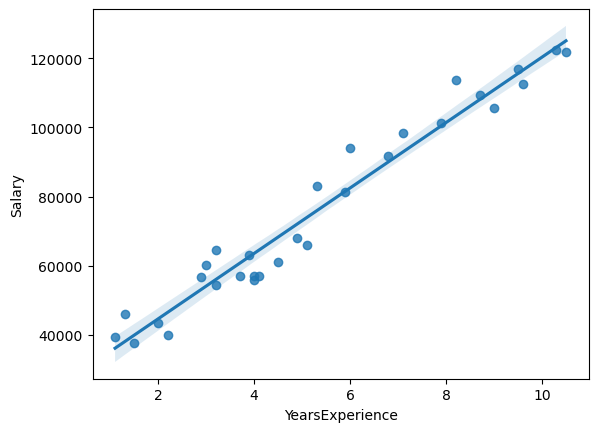

In [59]:
sns.regplot(x="YearsExperience", y="Salary", data=df1)
plt.show()

# Model building of Salary Hike

In [60]:
model_s = smf.ols('Salary~YearsExperience',data=df1).fit() 

In [61]:
model_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           1.14e-20
Time:                        04:28:36   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
model_s.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [63]:
model_s.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [64]:
model_s.predict(df1["YearsExperience"])

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [65]:
#t and p-Values

print(model_s.tvalues, '\n', model_s.pvalues)  

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [66]:
#R squared values

(model_s.rsquared, model_s.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

# Prediction

In [67]:
newdata1 = pd.Series([13,12])

In [68]:
data_pred1 =pd.DataFrame(newdata1,columns=['YearsExperience'])
data_pred1

,YearsExperience
0,13
1,12


In [69]:
model_s.predict(data_pred1)

0    148641.710378
1    139191.748056
dtype: float64